In [ ]:
"""
sklearn.datasets 中主要包含了一些公共数据集

load_iris(): 加载鸢尾花数据集，这是一个常用的多类分类数据集。
load_digits(): 加载手写数字数据集，每个实例都是一张8x8的数字图像及其对应的数字类别。
load_boston(): 加载波士顿房价数据集，这是一个回归问题的数据集。
load_breast_cancer(): 加载乳腺癌数据集，这是一个二分类问题的数据集。
load_diabetes(): 加载糖尿病数据集，这个数据集可以用于回归分析。

sklearn中决策树的用法

from sklearn.tree import DecisionTreeClassifier 分类树
from sklearn.tree import DecisionTreeRegressor 回归树
from sklearn.tree import plot_tree 画决策树
"""

Accuracy: 1.0


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

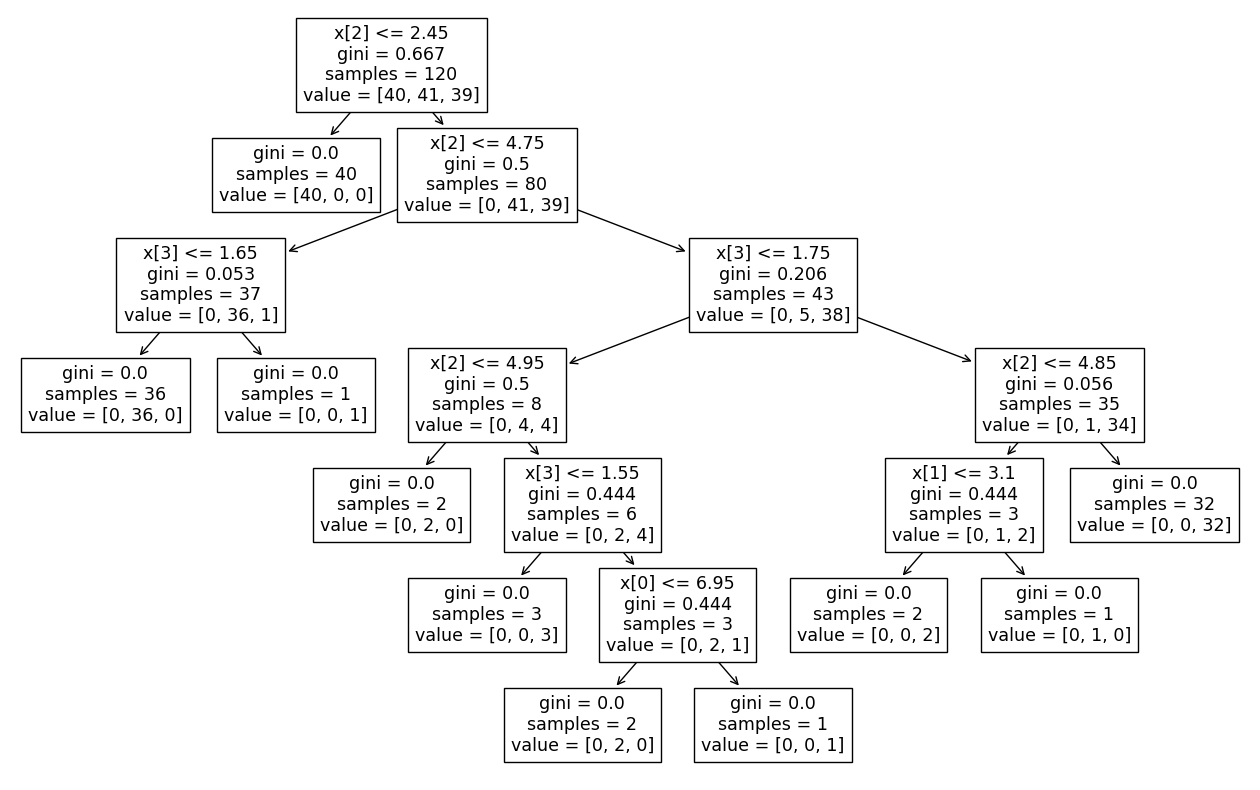

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import rcParams

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建决策树模型
clf = DecisionTreeClassifier()

# 训练模型
clf.fit(X_train, y_train)

# 预测
predictions = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


####画决策树曲线
rcParams['figure.figsize'] = 16, 10  # 设置为16宽, 10高的图像大小
plot_tree(clf)

In [2]:
# 参数优化
# 导入所需库和模块
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型
dt = DecisionTreeClassifier()

# 设置参数网格
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用网格搜索进行参数优化
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数训练模型
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# 预测测试集并计算准确率
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.2f}".format(accuracy))

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy on test set: 1.00
